## **Preposessing Dataset Training**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [1]:
! pip install sastrawi

## Import Library

In [2]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [3]:
test = pd.read_csv("./Dataset/Training/Training_Raw2/test_preprocess.csv", delimiter=",", on_bad_lines="skip")
test

,label,tweet
0,love,Pixy ini kok lama-lama gemesim yaaaa. Setelah ...
1,fear,Penyakit hepatitis B 100x lebih infeksius dari...
2,fear,[USERNAME] [USERNAME] [USERNAME] Gw lebih khaw...
3,anger,Kemerdekaan adalah hak segala bangsa ...( Kec ...
4,happy,"Selamat pak [USERNAME] resmi jadi bapak, seked..."
...,...,...
435,sadness,Ramadhan udah masuk hari yang ke-20 aja. tapi ...
436,sadness,kalo gue sik emang abis kehilangan seseorang y...
437,fear,"aku dong malem ini checkup darah,, ok warning ..."
438,anger,Dan besok musti pagi2 tangsel-bogor.. Dan (lag...


In [4]:
train = pd.read_csv("./Dataset/Training/Training_Raw2/train_preprocess.csv", on_bad_lines="skip", delimiter=",")
train

,label,tweet
0,happy,Ini adalah hal yang paling membahagiakan saat ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...
2,fear,yaudah kalo emang belum berani potong rambut p...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha..."
4,anger,temen2 masa kecil yang turned out being asshol...
...,...,...
3516,fear,[USERNAME] [USERNAME] Bcs doi w anak pelayaran...
3517,anger,"Sekali , dua kali , tiga kali , lama2 bosan ju..."
3518,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3519,fear,Aku takut tulisan ini terbaca di saat kamu ngg...


In [5]:
valid = pd.read_csv("./Dataset/Training/Training_Raw2/valid_preprocess.csv", on_bad_lines="skip", delimiter=",")
valid

,label,tweet
0,anger,[USERNAME] jaringannya mati ya? Tidak bisa dib...
1,anger,It's like a circle of stupidity. Atlit gak diu...
2,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3,happy,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
4,happy,"Di hari ini, yap tepat di tanggal 23 juli dima..."
...,...,...
435,anger,[USERNAME] [USERNAME] Mekanisme pemilihan dire...
436,fear,Ngasih tehaer ke keponakan. Baju dua biji cela...
437,love,HAHAHA BODO AMAT DEEHHH YG PENTING DI VIDEO IN...
438,sadness,"Langsung mewek baca thread ini, keren maksimal..."


Gabungkan semua data menjadi satu dataframe.

In [6]:
train_data = pd.concat([train, test, valid])

train_data.reset_index(inplace=True, drop=True)

train_data

,label,tweet
0,happy,Ini adalah hal yang paling membahagiakan saat ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...
2,fear,yaudah kalo emang belum berani potong rambut p...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha..."
4,anger,temen2 masa kecil yang turned out being asshol...
...,...,...
4396,anger,[USERNAME] [USERNAME] Mekanisme pemilihan dire...
4397,fear,Ngasih tehaer ke keponakan. Baju dua biji cela...
4398,love,HAHAHA BODO AMAT DEEHHH YG PENTING DI VIDEO IN...
4399,sadness,"Langsung mewek baca thread ini, keren maksimal..."


In [7]:
train_data.to_csv('./Dataset/Training/not_preposessing2.csv')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [8]:
eda_data = train_data.copy()

## Null Values

In [9]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


label    0
tweet    0
dtype: int64

## Data Types

In [10]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4401 non-null   object
 1   tweet   4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB


In [11]:
eda_data.head()


,label,tweet
0,happy,Ini adalah hal yang paling membahagiakan saat ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...
2,fear,yaudah kalo emang belum berani potong rambut p...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha..."
4,anger,temen2 masa kecil yang turned out being asshol...


## Label Proportion

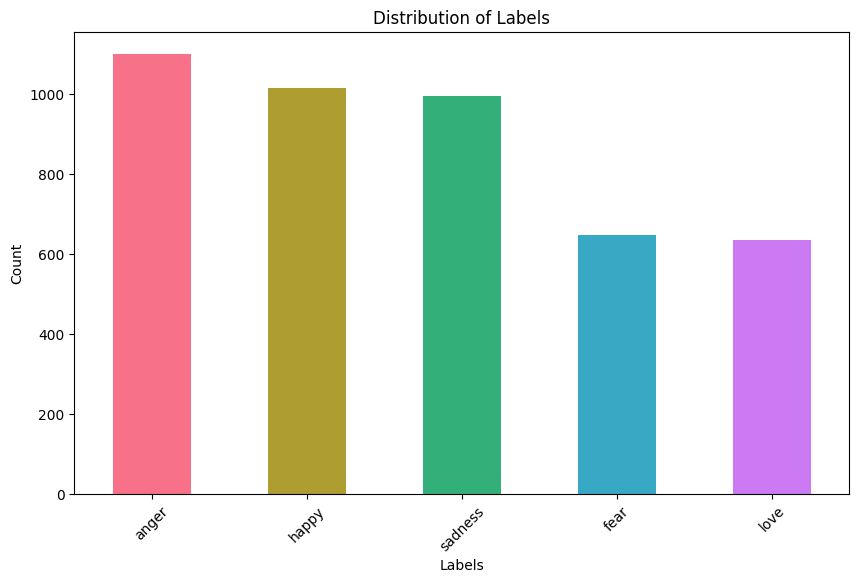

In [12]:
label_counts = eda_data["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [13]:
eda_data['Length'] = eda_data['tweet'].str.len()
eda_data.head(10)

,label,tweet,Length
0,happy,Ini adalah hal yang paling membahagiakan saat ...,111
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,255
2,fear,yaudah kalo emang belum berani potong rambut p...,195
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",144
4,anger,temen2 masa kecil yang turned out being asshol...,226
5,sadness,Terkadang apa yang kau dapati dan miliki saat ...,185
6,fear,TAMSIL ISLAM NUSANTARA. Karena kau cuma tiang ...,239
7,anger,[USERNAME] Skrg gini saja. Sy balik pertanyaan...,253
8,love,"Kalo kamuuuuuu, kamuu itu specialll. Cintanya ...",159
9,happy,Kasarnya dia bilang kalo pake lg dengerin musi...,146


In [14]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 182.35


In [15]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 802532.00


In [16]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [17]:
eda_data['Word_count'] = eda_data['tweet'].apply(word_count)
eda_data.head(10)

,label,tweet,Length,Word_count
0,happy,Ini adalah hal yang paling membahagiakan saat ...,111,13
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,255,35
2,fear,yaudah kalo emang belum berani potong rambut p...,195,33
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",144,23
4,anger,temen2 masa kecil yang turned out being asshol...,226,37
5,sadness,Terkadang apa yang kau dapati dan miliki saat ...,185,30
6,fear,TAMSIL ISLAM NUSANTARA. Karena kau cuma tiang ...,239,36
7,anger,[USERNAME] Skrg gini saja. Sy balik pertanyaan...,253,40
8,love,"Kalo kamuuuuuu, kamuu itu specialll. Cintanya ...",159,26
9,happy,Kasarnya dia bilang kalo pake lg dengerin musi...,146,24


In [18]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 126677.00


In [19]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 28.78


In [20]:
eda_data['mean_word_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,label,tweet,Length,Word_count,mean_word_length
0,happy,Ini adalah hal yang paling membahagiakan saat ...,111,13,7.615385
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,255,35,6.314286
2,fear,yaudah kalo emang belum berani potong rambut p...,195,33,4.878788
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",144,23,5.304348
4,anger,temen2 masa kecil yang turned out being asshol...,226,37,5.135135
5,sadness,Terkadang apa yang kau dapati dan miliki saat ...,185,30,5.200000
6,fear,TAMSIL ISLAM NUSANTARA. Karena kau cuma tiang ...,239,36,5.666667
7,anger,[USERNAME] Skrg gini saja. Sy balik pertanyaan...,253,40,5.350000
8,love,"Kalo kamuuuuuu, kamuu itu specialll. Cintanya ...",159,26,5.153846
9,happy,Kasarnya dia bilang kalo pake lg dengerin musi...,146,24,5.125000


In [21]:
eda_data['mean_sent_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,label,tweet,Length,Word_count,mean_word_length,mean_sent_length
0,happy,Ini adalah hal yang paling membahagiakan saat ...,111,13,7.615385,111.0
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,255,35,6.314286,127.0
2,fear,yaudah kalo emang belum berani potong rambut p...,195,33,4.878788,194.0
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",144,23,5.304348,71.5
4,anger,temen2 masa kecil yang turned out being asshol...,226,37,5.135135,226.0
5,sadness,Terkadang apa yang kau dapati dan miliki saat ...,185,30,5.200000,45.5
6,fear,TAMSIL ISLAM NUSANTARA. Karena kau cuma tiang ...,239,36,5.666667,79.0
7,anger,[USERNAME] Skrg gini saja. Sy balik pertanyaan...,253,40,5.350000,49.8
8,love,"Kalo kamuuuuuu, kamuu itu specialll. Cintanya ...",159,26,5.153846,31.0
9,happy,Kasarnya dia bilang kalo pake lg dengerin musi...,146,24,5.125000,48.0


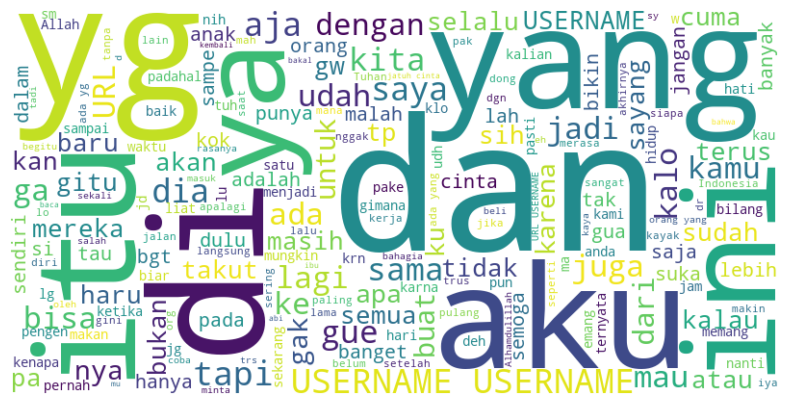

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_tweets = ' '.join(eda_data['tweet'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [23]:
import copy

train_data_copy = copy.deepcopy(train_data)


## Case Folding

### Lowercase

In [24]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [25]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_lowercase)

CPU times: total: 15.6 ms
Wall time: 30.6 ms


In [26]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,Ini adalah hal yang paling membahagiakan saat biasku foto bersama ELF #ReturnOfTheLittlePrince #HappyHeeChulDay,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday
1,"[USERNAME] [USERNAME] Dari pertama [USERNAME] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.Coba tanya Kenapa [USERNAME] ? Abdi rakyat butuh seoran","[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman Selamat beristirahat, jangan lupa berdoa Tidur yg nyenyak & mimpi yg indah Good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"Jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. Presentasi jam 16.00, ku baru grasak grusuk jam 13.23. Jiaaaaaaann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiaaaaaaann"
4,"temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"Terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. Apapun itu. Karena gak semua beban bisa di tanggung oleh seorang gantleman. Dialog Dini Hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari."
6,"TAMSIL ISLAM NUSANTARA. Karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. Bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[USERNAME] Skrg gini saja. Sy balik pertanyaannya. Bolehkah kah sy yg bukan Mahasiswa UMI ikut masuk ruang Kuliah dan mengerjakan Tugas Kuliah sprt Mhs lainnya? Bukan persoalan Ada larangan atau tidak. Tapi apa Gunanya Saya ikut Perkuliahan, kalo Saya n","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n"
8,"Kalo kamuuuuuu, kamuu itu specialll. Cintanya juga ga kalah kok sama yang lain. Karena sebenernya bagi aku kalian itu satu. Jadi, cinta satu cinta semua. [URL]","kalo kamuuuuuu, kamuu itu specialll. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,Kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya Shinhwa. Bikin pengen joget wkwk xD. Itu namanya autoreaction sih xD [URL],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url]


In [27]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_lowercase)

CPU times: total: 15.6 ms
Wall time: 5 ms


## Cleansing

### Menghapus username

In [28]:
def tweet_delete_username(tweet):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    tweet = re.sub(userPattern, '[USERNAME]', tweet)
    
    return tweet

In [29]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 11.9 ms


In [30]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday
1,"[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran","[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiaaaaaaann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiaaaaaaann"
4,"temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari."
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n"
8,"kalo kamuuuuuu, kamuu itu specialll. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]","kalo kamuuuuuu, kamuu itu specialll. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url]


In [31]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 6.1 ms


### Menghapus url

In [32]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '[URL]', tweet)
    return tweet

In [33]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_url)

CPU times: total: 46.9 ms
Wall time: 111 ms


In [34]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday
1,"[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran","[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiaaaaaaann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiaaaaaaann"
4,"temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari."
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n"
8,"kalo kamuuuuuu, kamuu itu specialll. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]","kalo kamuuuuuu, kamuu itu specialll. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url]


In [35]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_url)

CPU times: total: 109 ms
Wall time: 207 ms


### Menghapus kelebihan huruf

In [36]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [37]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 15.6 ms
Wall time: 117 ms


In [38]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday
1,"[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran","[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiaaaaaaann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann"
4,"temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari."
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n"
8,"kalo kamuuuuuu, kamuu itu specialll. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]","kalo kamu, kamuu itu special. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url]


In [39]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 62.5 ms
Wall time: 121 ms


### Menghapus Noise

In [40]:
def tweet_delete_noise(tweet):
        tweet = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', tweet)
        tweet = re.sub(r'\b(dah|doi|dih|kok|pol|brow|emyu|skin|anjir|anjay|njir|bjir|jir|njay|anjoy|ajg|min|admin|gan|sis|sih|ke|di|dari|lah|kudu|oalah|lha|yah|yha|amp|n|nih|loo|hadeuh|waduh|sok|na|cing|hadeuh|loh|lho|bro|cui|cuy|yuk|yok|kuy|kan)\b', '', tweet)
        return tweet

In [41]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_noise)

CPU times: total: 31.2 ms
Wall time: 201 ms


In [42]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday
1,"[username] [username] dari pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran","[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann"
4,"temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen2 masa kecil yang turned out being hole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa di tanggung oleh seorang gantleman. dialog dini hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari."
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya n","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya"
8,"kalo kamu, kamuu itu special. cintanya juga ga kalah kok sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]","kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction sih xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url]


In [43]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_noise)

CPU times: total: 31.2 ms
Wall time: 186 ms


### Menghapus new line dan new text

In [44]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [45]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 13.6 ms


In [46]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday
1,"[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran","[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann"
4,"temen2 masa kecil yang turned out being hole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen2 masa kecil yang turned out being hole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari."
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya"
8,"kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]","kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url]


In [47]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 12.2 ms


### Menghapus Hastag

In [48]:
def tweet_remove_hashtags(tweet):
    hashtag= r'#\w+'
    tweet = re.sub(hashtag, '', tweet)
    return tweet

In [49]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 17 ms


In [50]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf #returnofthelittleprince #happyheechulday,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf
1,"[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran","[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann"
4,"temen2 masa kecil yang turned out being hole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen2 masa kecil yang turned out being hole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari."
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya"
8,"kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]","kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url]


In [51]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 15.6 ms
Wall time: 25.8 ms


### Menghapus angka

In [52]:
def tweet_delete_number(tweet):
    number = r'\d+' 
    tweet = re.sub(number, '', tweet)
    return tweet

In [53]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_number)

CPU times: total: 31.2 ms
Wall time: 68.6 ms


In [54]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf
1,"[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran","[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran"
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit","yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit"
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam 16.00, ku baru grasak grusuk jam 13.23. jiann","jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam ., ku baru grasak grusuk jam .. jiann"
4,"temen2 masa kecil yang turned out being hole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang2 kek gitu, parahnya lagi kalo mereka pacaran bangsat","temen masa kecil yang turned out being hole itu kalo cewe jadi ukhti hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang kek gitu, parahnya lagi kalo mereka pacaran bangsat"
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari.","terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari."
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.","tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki."
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya","[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya"
8,"kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]","kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url]


In [55]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_number)

CPU times: total: 15.6 ms
Wall time: 67.2 ms


### Menghapus tanda baca

In [56]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [57]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 31.2 ms
Wall time: 66.9 ms


In [58]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf
1,"[username] [username] pertama [username] menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan.coba tanya kenapa [username] ? abdi rakyat butuh seoran",username username pertama username menduduki bangku jabatan anda rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan coba tanya kenapa username abdi rakyat butuh seoran
2,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman selamat beristirahat, jangan lupa berdoa tidur yg nyenyak & mimpi yg indah good night cit",yaudah kalo emang belum berani potong rambut pendek ya nanti aja kalo emang udah yakin dan bisa nyaman selamat beristirahat jangan lupa berdoa tidur yg nyenyak mimpi yg indah good night cit
3,"jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. presentasi jam ., ku baru grasak grusuk jam .. jiann",jadi semalam gw rekap eh intinya yg gw usahain kerja ternyata zero samsek presentasi jam ku baru grasak grusuk jam jiann
4,"temen masa kecil yang turned out being hole itu kalo cewe jadi ukhti hijrah kalo cowo jadi abdi negara, rasanya semua statement ku sosmed pasti yang menyangkal orang kek gitu, parahnya lagi kalo mereka pacaran bangsat",temen masa kecil yang turned out being hole itu kalo cewe jadi ukhti hijrah kalo cowo jadi abdi negara rasanya semua statement ku sosmed pasti yang menyangkal orang kek gitu parahnya lagi kalo mereka pacaran bangsat
5,"terkadang apa yang kau dapati dan miliki saat ini, ada orang lain yang menginginkanya juga. apapun itu. karena gak semua beban bisa tanggung oleh seorang gantleman. dialog dini hari.",terkadang apa yang kau dapati dan miliki saat ini ada orang lain yang menginginkanya juga apapun itu karena gak semua beban bisa tanggung oleh seorang gantleman dialog dini hari
6,"tamsil islam nusantara. karena kau cuma tiang yang dipancang tergesa-gesa kemarin sore dan pangkalmu cuma dangkal-dangkal saja ditanam, maka engkau jadi takut setengah mati pada angin. bahkan semilir yang segar pun kau caci dan kau kutuki.",tamsil islam nusantara karena kau cuma tiang yang dipancang tergesa gesa kemarin sore dan pangkalmu cuma dangkal dangkal saja ditanam maka engkau jadi takut setengah mati pada angin bahkan semilir yang segar pun kau caci dan kau kutuki
7,"[username] skrg gini saja. sy balik pertanyaannya. bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya? bukan persoalan ada larangan atau tidak. tapi apa gunanya saya ikut perkuliahan, kalo saya",username skrg gini saja sy balik pertanyaannya bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya bukan persoalan ada larangan atau tidak tapi apa gunanya saya ikut perkuliahan kalo saya
8,"kalo kamu, kamuu itu special. cintanya juga ga kalah sama yang lain. karena sebenernya bagi aku kalian itu satu. jadi, cinta satu cinta semua. [url]",kalo kamu kamuu itu special cintanya juga ga kalah sama yang lain karena sebenernya bagi aku kalian itu satu jadi cinta satu cinta semua url
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa. bikin pengen joget wkwk xd. itu namanya autoreaction xd [url],kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa bikin pengen joget wkwk xd itu namanya autoreaction xd url


In [59]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 46.9 ms
Wall time: 56.3 ms


### Menghapus Extra Spasi

In [60]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [61]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 0 ns
Wall time: 211 ms


In [62]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf
1,username username pertama username menduduki bangku jabatan anda rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan coba tanya kenapa username abdi rakyat butuh seoran,username username pertama username menduduki bangku jabatan anda rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan coba tanya kenapa username abdi rakyat butuh seoran
2,yaudah kalo emang belum berani potong rambut pendek ya nanti aja kalo emang udah yakin dan bisa nyaman selamat beristirahat jangan lupa berdoa tidur yg nyenyak mimpi yg indah good night cit,yaudah kalo emang belum berani potong rambut pendek ya nanti aja kalo emang udah yakin dan bisa nyaman selamat beristirahat jangan lupa berdoa tidur yg nyenyak mimpi yg indah good night cit
3,jadi semalam gw rekap eh intinya yg gw usahain kerja ternyata zero samsek presentasi jam ku baru grasak grusuk jam jiann,jadi semalam gw rekap eh intinya yg gw usahain kerja ternyata zero samsek presentasi jam ku baru grasak grusuk jam jiann
4,temen masa kecil yang turned out being hole itu kalo cewe jadi ukhti hijrah kalo cowo jadi abdi negara rasanya semua statement ku sosmed pasti yang menyangkal orang kek gitu parahnya lagi kalo mereka pacaran bangsat,temen masa kecil yang turned out being hole itu kalo cewe jadi ukhti hijrah kalo cowo jadi abdi negara rasanya semua statement ku sosmed pasti yang menyangkal orang kek gitu parahnya lagi kalo mereka pacaran bangsat
5,terkadang apa yang kau dapati dan miliki saat ini ada orang lain yang menginginkanya juga apapun itu karena gak semua beban bisa tanggung oleh seorang gantleman dialog dini hari,terkadang apa yang kau dapati dan miliki saat ini ada orang lain yang menginginkanya juga apapun itu karena gak semua beban bisa tanggung oleh seorang gantleman dialog dini hari
6,tamsil islam nusantara karena kau cuma tiang yang dipancang tergesa gesa kemarin sore dan pangkalmu cuma dangkal dangkal saja ditanam maka engkau jadi takut setengah mati pada angin bahkan semilir yang segar pun kau caci dan kau kutuki,tamsil islam nusantara karena kau cuma tiang yang dipancang tergesa gesa kemarin sore dan pangkalmu cuma dangkal dangkal saja ditanam maka engkau jadi takut setengah mati pada angin bahkan semilir yang segar pun kau caci dan kau kutuki
7,username skrg gini saja sy balik pertanyaannya bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya bukan persoalan ada larangan atau tidak tapi apa gunanya saya ikut perkuliahan kalo saya,username skrg gini saja sy balik pertanyaannya bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya bukan persoalan ada larangan atau tidak tapi apa gunanya saya ikut perkuliahan kalo saya
8,kalo kamu kamuu itu special cintanya juga ga kalah sama yang lain karena sebenernya bagi aku kalian itu satu jadi cinta satu cinta semua url,kalo kamu kamuu itu special cintanya juga ga kalah sama yang lain karena sebenernya bagi aku kalian itu satu jadi cinta satu cinta semua url
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa bikin pengen joget wkwk xd itu namanya autoreaction xd url,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa bikin pengen joget wkwk xd itu namanya autoreaction xd url


In [63]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 109 ms
Wall time: 299 ms


## Tokenization

In [64]:
from nltk.tokenize import word_tokenize 

In [65]:
def tweet_tokenize(tweet):
    return word_tokenize(tweet)

In [66]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_tokenize)

CPU times: total: 1 s
Wall time: 2.61 s


In [67]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,ini adalah hal yang paling membahagiakan saat biasku foto bersama elf,"[ini, adalah, hal, yang, paling, membahagiakan, saat, biasku, foto, bersama, elf]"
1,username username pertama username menduduki bangku jabatan anda rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa menduduki bangku jabatan coba tanya kenapa username abdi rakyat butuh seoran,"[username, username, pertama, username, menduduki, bangku, jabatan, anda, rakyat, belum, pernah, mendengar, dan, melihat, hasil, kerja, dan, prestasi, nyata, yang, anda, berikan, semasa, menduduki, bangku, jabatan, coba, tanya, kenapa, username, abdi, rakyat, butuh, seoran]"
2,yaudah kalo emang belum berani potong rambut pendek ya nanti aja kalo emang udah yakin dan bisa nyaman selamat beristirahat jangan lupa berdoa tidur yg nyenyak mimpi yg indah good night cit,"[yaudah, kalo, emang, belum, berani, potong, rambut, pendek, ya, nanti, aja, kalo, emang, udah, yakin, dan, bisa, nyaman, selamat, beristirahat, jangan, lupa, berdoa, tidur, yg, nyenyak, mimpi, yg, indah, good, night, cit]"
3,jadi semalam gw rekap eh intinya yg gw usahain kerja ternyata zero samsek presentasi jam ku baru grasak grusuk jam jiann,"[jadi, semalam, gw, rekap, eh, intinya, yg, gw, usahain, kerja, ternyata, zero, samsek, presentasi, jam, ku, baru, grasak, grusuk, jam, jiann]"
4,temen masa kecil yang turned out being hole itu kalo cewe jadi ukhti hijrah kalo cowo jadi abdi negara rasanya semua statement ku sosmed pasti yang menyangkal orang kek gitu parahnya lagi kalo mereka pacaran bangsat,"[temen, masa, kecil, yang, turned, out, being, hole, itu, kalo, cewe, jadi, ukhti, hijrah, kalo, cowo, jadi, abdi, negara, rasanya, semua, statement, ku, sosmed, pasti, yang, menyangkal, orang, kek, gitu, parahnya, lagi, kalo, mereka, pacaran, bangsat]"
5,terkadang apa yang kau dapati dan miliki saat ini ada orang lain yang menginginkanya juga apapun itu karena gak semua beban bisa tanggung oleh seorang gantleman dialog dini hari,"[terkadang, apa, yang, kau, dapati, dan, miliki, saat, ini, ada, orang, lain, yang, menginginkanya, juga, apapun, itu, karena, gak, semua, beban, bisa, tanggung, oleh, seorang, gantleman, dialog, dini, hari]"
6,tamsil islam nusantara karena kau cuma tiang yang dipancang tergesa gesa kemarin sore dan pangkalmu cuma dangkal dangkal saja ditanam maka engkau jadi takut setengah mati pada angin bahkan semilir yang segar pun kau caci dan kau kutuki,"[tamsil, islam, nusantara, karena, kau, cuma, tiang, yang, dipancang, tergesa, gesa, kemarin, sore, dan, pangkalmu, cuma, dangkal, dangkal, saja, ditanam, maka, engkau, jadi, takut, setengah, mati, pada, angin, bahkan, semilir, yang, segar, pun, kau, caci, dan, kau, kutuki]"
7,username skrg gini saja sy balik pertanyaannya bolehkah kah sy yg bukan mahasiswa umi ikut masuk ruang kuliah dan mengerjakan tugas kuliah sprt mhs lainnya bukan persoalan ada larangan atau tidak tapi apa gunanya saya ikut perkuliahan kalo saya,"[username, skrg, gini, saja, sy, balik, pertanyaannya, bolehkah, kah, sy, yg, bukan, mahasiswa, umi, ikut, masuk, ruang, kuliah, dan, mengerjakan, tugas, kuliah, sprt, mhs, lainnya, bukan, persoalan, ada, larangan, atau, tidak, tapi, apa, gunanya, saya, ikut, perkuliahan, kalo, saya]"
8,kalo kamu kamuu itu special cintanya juga ga kalah sama yang lain karena sebenernya bagi aku kalian itu satu jadi cinta satu cinta semua url,"[kalo, kamu, kamuu, itu, special, cintanya, juga, ga, kalah, sama, yang, lain, karena, sebenernya, bagi, aku, kalian, itu, satu, jadi, cinta, satu, cinta, semua, url]"
9,kasarnya dia bilang kalo pake lg dengerin musik yg kluar slalu musiknya shinhwa bikin pengen joget wkwk xd itu namanya autoreaction xd url,"[kasarnya, dia, bilang, kalo, pake, lg, dengerin, musik, yg, kluar, slalu, musiknya, shinhwa, bikin, pengen, joget, wkwk, xd, itu, namanya, autoreaction, xd, url]"


In [68]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_tokenize)

CPU times: total: 1.03 s
Wall time: 1.9 s


## Normalization

### Import Kamus

In [69]:
kamus_singkatan = pd.read_csv("./Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [70]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [71]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [72]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [73]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 2min 28s
Wall time: 3min 50s


In [74]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[ini, adalah, hal, yang, paling, membahagiakan, saat, biasku, foto, bersama, elf]","[ini, adalah, hal, yang, paling, membahagiakan, saat, biasku, foto, bersama, elf]"
1,"[username, username, pertama, username, menduduki, bangku, jabatan, anda, rakyat, belum, pernah, mendengar, dan, melihat, hasil, kerja, dan, prestasi, nyata, yang, anda, berikan, semasa, menduduki, bangku, jabatan, coba, tanya, kenapa, username, abdi, rakyat, butuh, seoran]","[username, username, pertama, username, menduduki, bangku, jabatan, anda, rakyat, belum, pernah, mendengar, dan, melihat, hasil, kerja, dan, prestasi, nyata, yang, anda, berikan, semasa, menduduki, bangku, jabatan, coba, tanya, kenapa, username, abdi, rakyat, butuh, seoran]"
2,"[yaudah, kalo, emang, belum, berani, potong, rambut, pendek, ya, nanti, aja, kalo, emang, udah, yakin, dan, bisa, nyaman, selamat, beristirahat, jangan, lupa, berdoa, tidur, yg, nyenyak, mimpi, yg, indah, good, night, cit]","[yaudah, kalau, memang, belum, berani, potong, rambut, pendek, ya, nanti, saja, kalau, memang, sudah, yakin, dan, bisa, nyaman, selamat, beristirahat, jangan, lupa, berdoa, tidur, yang, nyenyak, mimpi, yang, indah, good, night, cit]"
3,"[jadi, semalam, gw, rekap, eh, intinya, yg, gw, usahain, kerja, ternyata, zero, samsek, presentasi, jam, ku, baru, grasak, grusuk, jam, jiann]","[jadi, semalam, saya, rekap, eh, intinya, yang, saya, usahain, kerja, ternyata, zero, samsek, presentasi, jam, ku, baru, grasak, grusuk, jam, jiann]"
4,"[temen, masa, kecil, yang, turned, out, being, hole, itu, kalo, cewe, jadi, ukhti, hijrah, kalo, cowo, jadi, abdi, negara, rasanya, semua, statement, ku, sosmed, pasti, yang, menyangkal, orang, kek, gitu, parahnya, lagi, kalo, mereka, pacaran, bangsat]","[teman, masa, kecil, yang, turned, out, being, hole, itu, kalau, cewek, jadi, ukhti, hijrah, kalau, cowok, jadi, abdi, negara, rasanya, semua, statement, ku, sosmed, pasti, yang, menyangkal, orang, kek, begitu, parahnya, lagi, kalau, mereka, pacaran, bangsat]"
5,"[terkadang, apa, yang, kau, dapati, dan, miliki, saat, ini, ada, orang, lain, yang, menginginkanya, juga, apapun, itu, karena, gak, semua, beban, bisa, tanggung, oleh, seorang, gantleman, dialog, dini, hari]","[terkadang, apa, yang, kamu, dapati, dan, miliki, saat, ini, ada, orang, lain, yang, menginginkanya, juga, apapun, itu, karena, tidak, semua, beban, bisa, tanggung, oleh, seorang, gantleman, dialog, dini, hari]"
6,"[tamsil, islam, nusantara, karena, kau, cuma, tiang, yang, dipancang, tergesa, gesa, kemarin, sore, dan, pangkalmu, cuma, dangkal, dangkal, saja, ditanam, maka, engkau, jadi, takut, setengah, mati, pada, angin, bahkan, semilir, yang, segar, pun, kau, caci, dan, kau, kutuki]","[tamsil, islam, nusantara, karena, kamu, cuma, tiang, yang, dipancang, tergesa, gesa, kemarin, sore, dan, pangkalmu, cuma, dangkal, dangkal, saja, ditanam, maka, engkau, jadi, takut, setengah, mati, pada, angin, bahkan, semilir, yang, segar, pun, kamu, caci, dan, kamu, kutuki]"
7,"[username, skrg, gini, saja, sy, balik, pertanyaannya, bolehkah, kah, sy, yg, bukan, mahasiswa, umi, ikut, masuk, ruang, kuliah, dan, mengerjakan, tugas, kuliah, sprt, mhs, lainnya, bukan, persoalan, ada, larangan, atau, tidak, tapi, apa, gunanya, saya, ikut, perkuliahan, kalo, saya]","[username, sekarang, gini, saja, saya, balik, pertanyaannya, bolehkah, kah, saya, yang, bukan, mahasiswa, umi, ikut, masuk, ruang, kuliah, dan, mengerjakan, tugas, kuliah, seperti, mahasiswa, lainnya, bukan, persoalan, ada, larangan, atau, tidak, tapi, apa, gunanya, saya, ikut, perkuliahan, kalau, saya]"
8,"[kalo, kamu, kamuu, itu, special, cintanya, juga, ga, kalah, sama, yang, lain, karena, sebenernya, bagi, aku, kalian, itu, satu, jadi, cinta, satu, cinta, semua, url]","[kalau, kamu, kamuu, itu, special, cintanya, juga, tidak, kalah, sama, yang, lain, karena, sebenarnya, bagi, saya, kalian, itu, satu, jadi, cinta, satu, cinta, semua, url]"
9,"[kasarnya, dia, bilang, kalo, pake, lg, dengerin, mus

In [75]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["tweet"][i]:
        tokenize_tweet = tweet_replace_contractions(tokenize_tweet)
        himpunan_kata.append(tokenize_tweet)
    train_data_copy["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 1min 16s
Wall time: 1min 49s


### Stemming

In [76]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [77]:
def tweet_stemming(tweet):
    # Check if the input is a list
    if isinstance(tweet, list):
        stemmed_tweets = []
        # Iterate through each tweet in the list
        for t in tweet:
            # Create a stemmer object
            stemmer = factory.create_stemmer()
            # Stem the tweet and append to the list of stemmed tweets
            stemmed_tweets.append(stemmer.stem(t))
        # Return the list of stemmed tweets
        return stemmed_tweets
    else:
        # If the input is not a list, create a stemmer object
        stemmer = factory.create_stemmer()
        # Stem the single tweet and return
        return stemmer.stem(tweet)

In [78]:
train_data["tweet"] = train_data["tweet"].apply(tweet_stemming)

KeyboardInterrupt: 

In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[pagi, sudah, buat, emosi]","[pagi, sudah, buat, emosi]"
1,"[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, menyuburkan, ormas, radikal, intoleran, teroris, yang, berafiliasi, partai, tertentu, narasi, klhtn, intelektual, tapi, bodoh]","[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, subur, ormas, radikal, intoleran, teroris, yang, afiliasi, partai, tentu, narasi, klhtn, intelektual, tapi, bodoh]"
2,"[emosi, terus, liat]","[emosi, terus, liat]"
3,"[aib, bodoh, benar, sebelum, kata, aib, itu, muncul, terlebih, dahulu, sudah, ada, tindakan, yakni, kekejian, jangan, kamu, sembunyikan, caramu, menelaah, masalah, semisal, anak, perempuanmu, ditempeleng, apa, kamu, juga, setuju, untuk, dia, bersikap, bungkam, melapor, polisi, adl, benar, lantas, apa, bedanya]","[aib, bodoh, benar, belum, kata, aib, itu, muncul, lebih, dahulu, sudah, ada, tindak, yakni, keji, jangan, kamu, sembunyi, cara, telaah, masalah, misal, anak, perempuan, tempeleng, apa, kamu, juga, tuju, untuk, dia, sikap, bungkam, lapor, polisi, adl, benar, lantas, apa, beda]"
4,"[kamu, yang, menyebalkan, bodoh]","[kamu, yang, sebal, bodoh]"
5,"[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]","[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]"
6,"[drama, abg, tolol]","[drama, abg, tolol]"
7,"[masih, emosi, sama, katla, kemarin, mana, keterangannya, gini, saja, hasil, mengaci, kesal]","[masih, emosi, sama, katla, kemarin, mana, terang, gin, saja, hasil, aci, kesal]"
8,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, sepertinya]","[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, seperti]"
9,"[ingin, pergi, jauh, terus, teriak, sambil, nangis, sekencang, kencangnya, nanti, balik, kalau, saya, sudah, lupa, segalanya, wkwj, kan, tolol, mustahil, sekali]","[ingin, pergi, jauh, terus, teriak, sambil, nang, kencang, kencang, nanti, balik, kalau, saya, sudah, lupa, segala, wkwj, kan, tolol, mustahil, sekali]"


In [ ]:
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_stemming)

### Stopwords Removal

In [ ]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [ ]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_tweet in train_data["tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 7.27 s
Wall time: 11.6 s


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[pagi, sudah, buat, emosi]","[pagi, emosi]"
1,"[stabilitas, negara, memange, tahun, negara, tidak, aman, bahkan, sby, subur, ormas, radikal, intoleran, teroris, yang, afiliasi, partai, tentu, narasi, klhtn, intelektual, tapi, bodoh]","[stabilitas, negara, memange, tahun, negara, aman, sby, subur, ormas, radikal, intoleran, teroris, afiliasi, partai, narasi, klhtn, intelektual, bodoh]"
2,"[emosi, terus, liat]","[emosi, liat]"
3,"[aib, bodoh, benar, belum, kata, aib, itu, muncul, lebih, dahulu, sudah, ada, tindak, yakni, keji, jangan, kamu, sembunyi, cara, telaah, masalah, misal, anak, perempuan, tempeleng, apa, kamu, juga, tuju, untuk, dia, sikap, bungkam, lapor, polisi, adl, benar, lantas, apa, beda]","[aib, bodoh, aib, muncul, tindak, keji, sembunyi, telaah, anak, perempuan, tempeleng, sikap, bungkam, lapor, polisi, adl, lantas, beda]"
4,"[kamu, yang, sebal, bodoh]","[sebal, bodoh]"
5,"[asli, malu, maluin, orang, indo, tolol, yang, rep, latah, cilukba, pakai, huruf, hijaiyah, sama, ngntd, sama, ganti, huruf, t, pakai, salib, ada, tiktok, filipin, lewat, fyp, saya, dan, repnya, ngtd, semua, dasar, goblogg, trend, tiktok, ter, tolol]","[asli, malu, maluin, indo, tolol, rep, latah, cilukba, pakai, huruf, hijaiyah, ngntd, ganti, huruf, pakai, salib, tiktok, filipin, fyp, repnya, ngtd, dasar, goblogg, trend, tiktok, ter, tolol]"
6,"[drama, abg, tolol]","[drama, abg, tolol]"
7,"[masih, emosi, sama, katla, kemarin, mana, terang, gin, saja, hasil, aci, kesal]","[emosi, katla, kemarin, terang, gin, hasil, aci, kesal]"
8,"[bangsat, tribute, no, bencana, no, mau, ngalahin, ini, seperti]","[bangsat, tribute, no, bencana, no, ngalahin]"
9,"[ingin, pergi, jauh, terus, teriak, sambil, nang, kencang, kencang, nanti, balik, kalau, saya, sudah, lupa, segala, wkwj, kan, tolol, mustahil, sekali]","[pergi, teriak, nang, kencang, kencang, lupa, wkwj, tolol, mustahil]"


In [ ]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_tweet in train_data_copy["tweet"][i]:
        tokenize_tweet = tweet_stopwords_removal(tokenize_tweet)
        if tokenize_tweet == "":
            pass
        else:
            himpunan_kata.append(tokenize_tweet)
    train_data_copy["tweet"][i]=himpunan_kata
    i+1

CPU times: total: 12.8 s
Wall time: 15.3 s


## Saving Preposessing

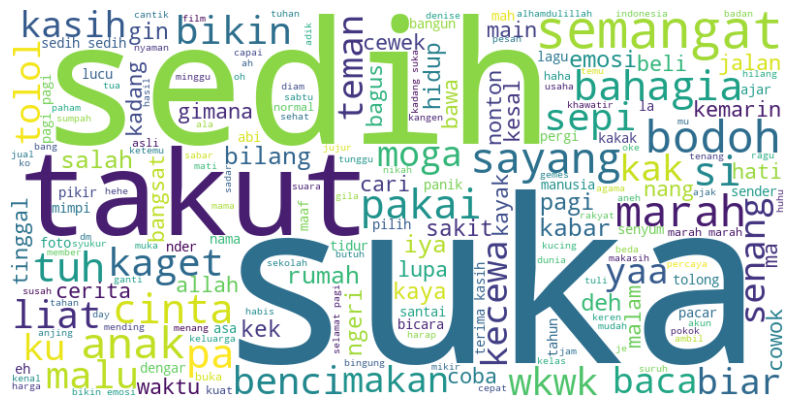

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_data with a column "tweet"
# containing the tweets

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['tweet'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['tweet'],
    'After ': train_data['tweet']
})

# Set max_colwidth option to ensure that long strings are displayed completely
pd.options.display.max_colwidth = 150

# Display the DataFrame as an HTML table
display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,pagi2 udah di buat emosi :),"[pagi, emosi]"
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..","[stabilitas, negara, memange, tahun, negara, aman, sby, subur, ormas, radikal, intoleran, teroris, afiliasi, partai, narasi, klhtn, intelektual, bodoh]"
2,dah lah emosi mulu liat emyu,"[emosi, liat]"
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya","[aib, bodoh, aib, muncul, tindak, keji, sembunyi, telaah, anak, perempuan, tempeleng, sikap, bungkam, lapor, polisi, adl, lantas, beda]"
4,dih lu yg nyebelin bego,"[sebal, bodoh]"
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp aku dan repnya ""ngtd"" semua, dasar goblogg trend tiktok ter tolol","[asli, malu, maluin, indo, tolol, rep, latah, cilukba, pakai, huruf, hijaiyah, ngntd, ganti, huruf, pakai, salib, tiktok, filipin, fyp, repnya, ngtd, dasar, goblogg, trend, tiktok, ter, tolol]"
6,drama abg tolol,"[drama, abg, tolol]"
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,"[emosi, katla, kemarin, terang, gin, hasil, aci, kesal]"
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya","[bangsat, tribute, no, bencana, no, ngalahin]"
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,"[pergi, teriak, nang, kencang, kencang, lupa, wkwj, tolol, mustahil]"


In [ ]:
train_data.to_csv("Dataset/Training/Clean_train_data2.csv")